In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)
# from tensorflow.keras.utils import set_random_seed

# tf.set_random_seed(1)
import tensorflow
import cv2
from PIL import Image
tensorflow.random.set_seed(1)

In [2]:
# df = pd.DataFrame(columns=['genre', 'paintings'])
# genre_folder = os.listdir('C:/Users/Stephanie Chung/Documents/NTUIM 2022 Fall/深度學習實作應用/Final Project/Wikiart_webcrawl/genre_data')
# root_path = r"C:/Users/Stephanie Chung/Documents/NTUIM 2022 Fall/深度學習實作應用/Final Project/Wikiart_webcrawl/genre_data/"
# cnt = 0
# for genre in genre_folder:
#     paintings = os.listdir(root_path + genre)
#     for num in paintings:
#         print(num)
#         original_file = os.path.join(root_path, genre, str(num))
#         new_name = genre +'_' +str(num)
#         dest_file = os.path.join(root_path, genre, new_name)
#         os.rename(original_file, dest_file)
#         # print(dest_file)
# #     df.loc[cnt] = [genre, paintings]
# #     cnt += 1
# # df

In [3]:
# import os, random, shutil
# def moveFile(fileDir):
#   pathDir = os.listdir(fileDir)
#   for i in pathDir:
#             Dir = os.listdir('/content/drive/MyDrive/images/'+str(i))    #取圖片的原始路徑
#             filenumber=len(Dir)
#             print(filenumber)
#             rate=0.1    #自定義抽取圖片的比例，比方說100張抽10張，那就是0.1
#             picknumber=int(filenumber*rate) #按照rate比例從資料夾中取一定數量圖片
#             sample = random.sample(Dir, picknumber)  #隨機選取picknumber數量的樣本圖片
#             print (sample)
#             for name in sample:
#                    shutil.move('/content/drive/MyDrive/images/'+i+'/'+name, '/content/drive/MyDrive/images/test/'+name)
#             # return
 
# if __name__ == '__main__':
#      fileDir = "/content/drive/MyDrive/images/"    #源圖片資料夾路徑
#      tarDir = '/content/drive/MyDrive/images/test/'    #移動到新的資料夾路徑
#      moveFile(fileDir)   

In [4]:
root_path = r'C:\Users\Stephanie Chung\Documents\NTUIM 2022 Fall\DLA\Final Project\Wikiart_webcrawl\genre_data'
root_folder = os.listdir(root_path)
genre_df = pd.DataFrame(columns=['genre','paintings'])
cnt = 0
for genre in root_folder:
    paintings = len(os.listdir(root_path + '/' + genre))
    genre_df.loc[cnt] = [genre, paintings]
    cnt += 1
genre_df

genre  paintings
0   Abstract_Expressionism        324
1                  Baroque        270
2                   Cubism        324
3        Early_Renaissance        324
4            Expressionism        315
5         High_Renaissance        324
6            Impressionism        247
7                Mannerism        324
8     Northern_Renaissance        233
9                  Pop_Art        324
10      Post_Impressionism        266
11             Primitivism        324
12       Proto_Renaissance        324
13                 Realism        313
14             Romanticism        322
15              Surrealism        324
16               Symbolism        324

In [5]:
# Sort artists by number of paintings
genre_df = genre_df.sort_values(by=['paintings'], ascending=False)

genre_df['class_weight'] = genre_df.paintings.sum() / (genre_df.shape[0] * genre_df.paintings)
genre_df

genre  paintings  class_weight
0   Abstract_Expressionism        324      0.945171
7                Mannerism        324      0.945171
15              Surrealism        324      0.945171
12       Proto_Renaissance        324      0.945171
11             Primitivism        324      0.945171
9                  Pop_Art        324      0.945171
16               Symbolism        324      0.945171
5         High_Renaissance        324      0.945171
3        Early_Renaissance        324      0.945171
2                   Cubism        324      0.945171
14             Romanticism        322      0.951041
4            Expressionism        315      0.972176
13                 Realism        313      0.978388
1                  Baroque        270      1.134205
10      Post_Impressionism        266      1.151261
6            Impressionism        247      1.239819
8     Northern_Renaissance        233      1.314315

## 選擇 Pop art, Surrealism Barque


In [6]:
# use_list = ['Pop_Art','Expressionism']
# # use_list = ['Pop_Art','Impressionism','Baroque']
# genre_2 = genre_df[genre_df['genre'].isin(use_list)]
genre_df.shape

(17, 3)

In [7]:
# Augment data
batch_size = 8
train_input_shape = (224, 224, 3)
n_classes = genre_df.shape[0]
images_dir = root_path
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                #    shear_range=5,
                                   #zoom_range=0.7,
                                #    horizontal_flip=True,
                                #    vertical_flip=True,
                                  )

train_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=genre_df['genre'].tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=genre_df['genre'].tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 4175 images belonging to 17 classes.
Found 1031 images belonging to 17 classes.
Total number of batches = 521 and 128


In [121]:
datagen = ImageDataGenerator()
# In ./dataset directory, there is `test` directory.
test_path = r'C:\Users\Stephanie Chung\Documents\NTUIM 2022 Fall\DLA\Final Project\Wikiart_webcrawl\test'
test_data_gen = datagen.flow_from_directory(test_path, 
                                        class_mode='categorical',
                                        target_size=train_input_shape[0:2],
                                        batch_size=batch_size,
                                        
                                        shuffle=True,
                                        classes=genre_df['genre'].tolist())
STEP_SIZE_TEST = test_data_gen.n//test_data_gen.batch_size
print("Total number of batches =", STEP_SIZE_TEST)

Found 570 images belonging to 17 classes.
Total number of batches = 71


1/1 [==============================] - 0s 34ms/step
y pred [array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.5461161e-35, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.4077906e-36, 2.2427586e-32, 6.2597167e-32, 7.4238785e-24,
        1.0431426e-06, 7.4194529e-19, 6.2742974e-25, 5.2987072e-25,
        9.9706109e-18, 8.5409497e-25, 0.0000000e+00, 1.9539701e-08,
        0.0000000e+00, 1.3186325e-37, 1.5854146e-28, 5.3945948e-29,
        9.9999893e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [7.1651244e-33, 9.3559058e-15, 5.1725541e-10,

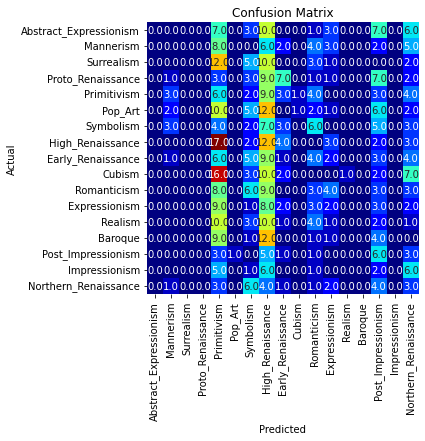

Classification Report:
                        precision    recall  f1-score   support

Abstract_Expressionism       0.00      0.00      0.00        37
             Mannerism       0.00      0.00      0.00        30
            Surrealism       0.00      0.00      0.00        33
     Proto_Renaissance       0.00      0.00      0.00        34
           Primitivism       0.04      0.17      0.07        35
               Pop_Art       0.00      0.00      0.00        41
             Symbolism       0.04      0.06      0.05        33
      High_Renaissance       0.08      0.28      0.13        43
     Early_Renaissance       0.04      0.03      0.03        35
                Cubism       0.00      0.00      0.00        41
           Romanticism       0.08      0.08      0.08        36
         Expressionism       0.08      0.07      0.07        30
               Realism       0.00      0.00      0.00        32
               Baroque       0.00      0.00      0.00        28
    Post_Impress

c:\Users\Stephanie Chung\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Stephanie Chung\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Stephanie Chung\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [131]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns



def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(70):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    print("y pred",y_pred)
    print("y true",y_true)
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
    
    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(5,5))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(17))
    # conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".1f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=genre_df['genre'].tolist(), yticklabels=genre_df['genre'].tolist(),
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()

    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(17), target_names=genre_df['genre'].tolist()))

showClassficationReport_Generator(model_efficientnet_150, test_data_gen, STEP_SIZE_TEST)

In [124]:
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

image = Image.open(r'C:\Users\Stephanie Chung\Documents\NTUIM 2022 Fall\DLA\Final Project\Wikiart_webcrawl\genre_data\Abstract_Expressionism\Abstract_Expressionism_0.jpg')
i

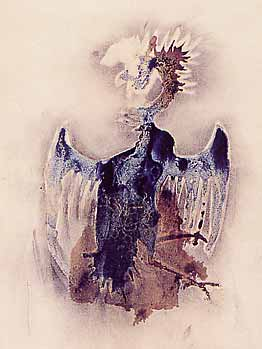

In [126]:
image

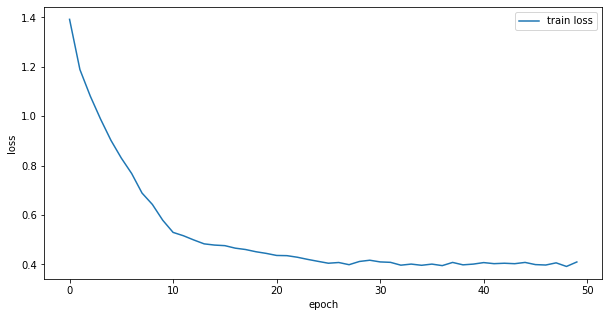

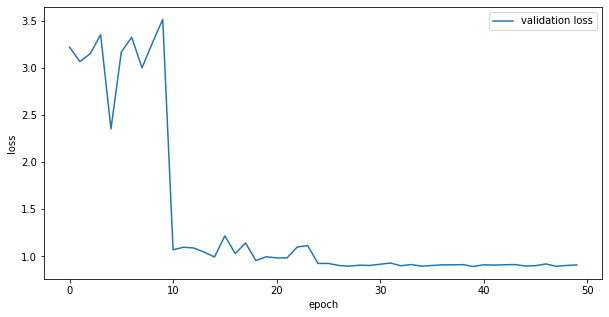

In [21]:
plt.figure(figsize=(10,5), linewidth = 2)
plt.plot(history_efficientnet.epoch, history_efficientnet.history['loss'], label = 'train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5), linewidth = 2)
plt.plot(history_efficientnet.epoch, history_efficientnet.history['val_loss'], label = 'validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
model_efficientnet_150.save('efficientnet_150.h5')

In [23]:
# Prediction accuracy on train data
score = model_efficientnet_150.evaluate(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

# Prediction accuracy on CV data
score = model_efficientnet_150.evaluate(valid_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

504/504 [==============================] - 65s 129ms/step - loss: 0.4397 - accuracy: 0.9496
Prediction accuracy on train data = 0.9496027827262878
125/125 [==============================] - 17s 132ms/step - loss: 0.9200 - accuracy: 0.7778
Prediction accuracy on CV data = 0.7777777910232544


## >100
1. ResNet50(尚未)
2. DenseNet201(v)
3. VGG16

In [13]:
artists_sort_100 = artists_sort[artists_sort['paintings'] >= 100]
artists_sort_100

name  paintings  class_weight
0        Vincent van Gogh        877      0.192611
1             Edgar Degas        702      0.240627
2           Pablo Picasso        439      0.384784
3   Pierre-Auguste Renoir        336      0.502738
4         Albrecht Dürer        328      0.515000
5            Paul Gauguin        311      0.543151
6          Francisco Goya        291      0.580481
7               Rembrandt        262      0.644733
8           Alfred Sisley        259      0.652201
9                  Titian        255      0.662431
10           Marc Chagall        239      0.706778
11          Rene Magritte        194      0.870722
12      Amedeo Modigliani        193      0.875233
13              Paul Klee        188      0.898511
14          Henri Matisse        186      0.908172
15            Andy Warhol        181      0.933260
16         Mikhail Vrubel        171      0.987836
17      Sandro Botticelli        164      1.030000
18      Leonardo da Vinci        143      1.181259
19      Peter Paul Rubens        141      1.198014
20          Salvador Dali        139      1.215252
21       Hieronymus Bosch        137      1.232993
22         Pieter Bruegel        134      1.260597
23        Diego Velazquez        128      1.319687
24       Kazimir Malevich        126      1.340635
25            Frida Kahlo        120      1.407667
26      Giotto di Bondone        119      1.419496
27           Gustav Klimt        117      1.443761
28                Raphael        109      1.549725
29              Joan Miro        102      1.656078

In [14]:
# Set class weights - assign higher weights to underrepresented classes
class_weights_100 = artists_sort_100['class_weight'].to_dict()
class_weights_100

{0: 0.19261117445838086,
 1: 0.24062678062678064,
 2: 0.38478359908883825,
 3: 0.5027380952380952,
 4: 0.515,
 5: 0.5431511254019292,
 6: 0.5804810996563574,
 7: 0.6447328244274809,
 8: 0.6522007722007722,
 9: 0.6624313725490196,
 10: 0.7067782426778243,
 11: 0.8707216494845361,
 12: 0.8752331606217617,
 13: 0.8985106382978724,
 14: 0.9081720430107527,
 15: 0.9332596685082873,
 16: 0.9878362573099415,
 17: 1.03,
 18: 1.1812587412587412,
 19: 1.1980141843971632,
 20: 1.215251798561151,
 21: 1.232992700729927,
 22: 1.2605970149253731,
 23: 1.3196875,
 24: 1.3406349206349206,
 25: 1.4076666666666666,
 26: 1.4194957983193277,
 27: 1.4437606837606838,
 28: 1.549724770642202,
 29: 1.656078431372549}

In [15]:
updated_name = "Albrecht_Dürer".replace("_", " ")
artists_sort.iloc[4, 0] = updated_name
artists_sort_100.iloc[4, 0] = updated_name

In [16]:
# images_dir = './images/train'
artists_dirs_100 = os.listdir(images_dir)
artists_sort100_name = artists_sort_100['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists_sort100_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

Found --> ./train\Vincent_van_Gogh
Found --> ./train\Edgar_Degas
Found --> ./train\Pablo_Picasso
Found --> ./train\Pierre-Auguste_Renoir
Found --> ./train\Albrecht_Dürer
Found --> ./train\Paul_Gauguin
Found --> ./train\Francisco_Goya
Found --> ./train\Rembrandt
Found --> ./train\Alfred_Sisley
Found --> ./train\Titian
Found --> ./train\Marc_Chagall
Found --> ./train\Rene_Magritte
Found --> ./train\Amedeo_Modigliani
Found --> ./train\Paul_Klee
Found --> ./train\Henri_Matisse
Found --> ./train\Andy_Warhol
Found --> ./train\Mikhail_Vrubel
Found --> ./train\Sandro_Botticelli
Found --> ./train\Leonardo_da_Vinci
Found --> ./train\Peter_Paul_Rubens
Found --> ./train\Salvador_Dali
Found --> ./train\Hieronymus_Bosch
Found --> ./train\Pieter_Bruegel
Found --> ./train\Diego_Velazquez
Found --> ./train\Kazimir_Malevich
Found --> ./train\Frida_Kahlo
Found --> ./train\Giotto_di_Bondone
Found --> ./train\Gustav_Klimt
Found --> ./train\Raphael
Found --> ./train\Joan_Miro


In [17]:
# Augment data
batch_size = 8
train_input_shape = (224, 224, 3)
n_classes100 = artists_sort_100.shape[0]

train_datagen_100 = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   shear_range=5,
                                   #zoom_range=0.7,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )

train_generator_100 = train_datagen_100.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_sort100_name.tolist()
                                                   )

valid_generator_100 = train_datagen_100.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_sort100_name.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator_100.n//train_generator_100.batch_size
STEP_SIZE_VALID = valid_generator_100.n//valid_generator_100.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 5112 images belonging to 30 classes.
Found 1263 images belonging to 30 classes.
Total number of batches = 639 and 157


### efficientnet >100

In [18]:
n_epoch = 100

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [19]:
# Load pre-trained model

model_efficientnet100 = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=train_input_shape)

for layer in model_efficientnet100.layers:
    layer.trainable = True

In [20]:
# Add layers at the end
X = model_efficientnet100.output
X = Flatten()(X)

X = Dense(64, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes100, activation='softmax')(X)

efficientnet100 = Model(inputs=model_efficientnet100.input, outputs=output)

In [21]:
optimizer = Adam(lr=0.0001)
efficientnet100.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

c:\Users\Stephanie Chung\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
n_epoch = 100

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [23]:
for layer in efficientnet100.layers[:100]:
    layer.trainable = True

In [24]:
# Train the model - all layers
history_efficientnet100 = efficientnet100.fit_generator(generator=train_generator_100, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator_100, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
                              callbacks=[reduce_lr, early_stop],
                            #   use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights_100
                             )

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_14432/3740154727.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_efficientnet100 = efficientnet100.fit_generator(generator=train_generator_100, steps_per_epoch=STEP_SIZE_TRAIN,


Epoch 1/100
639/639 [==============================] - 142s 188ms/step - loss: 2.3093 - accuracy: 0.0933 - val_loss: 3.5272 - val_accuracy: 0.0255 - lr: 1.0000e-04
Epoch 2/100
639/639 [==============================] - 110s 171ms/step - loss: 2.0966 - accuracy: 0.2021 - val_loss: 3.4364 - val_accuracy: 0.0239 - lr: 1.0000e-04
Epoch 3/100
639/639 [==============================] - 104s 162ms/step - loss: 1.9556 - accuracy: 0.2637 - val_loss: 3.4403 - val_accuracy: 0.0366 - lr: 1.0000e-04
Epoch 4/100
639/639 [==============================] - 107s 167ms/step - loss: 1.8437 - accuracy: 0.3140 - val_loss: 3.2667 - val_accuracy: 0.1393 - lr: 1.0000e-04
Epoch 5/100
639/639 [==============================] - 111s 173ms/step - loss: 1.7243 - accuracy: 0.3646 - val_loss: 3.9718 - val_accuracy: 0.0669 - lr: 1.0000e-04
Epoch 6/100
639/639 [==============================] - 115s 180ms/step - loss: 1.6056 - accuracy: 0.4043 - val_loss: 3.6079 - val_accuracy: 0.0525 - lr: 1.0000e-04
Epoch 7/100
639/

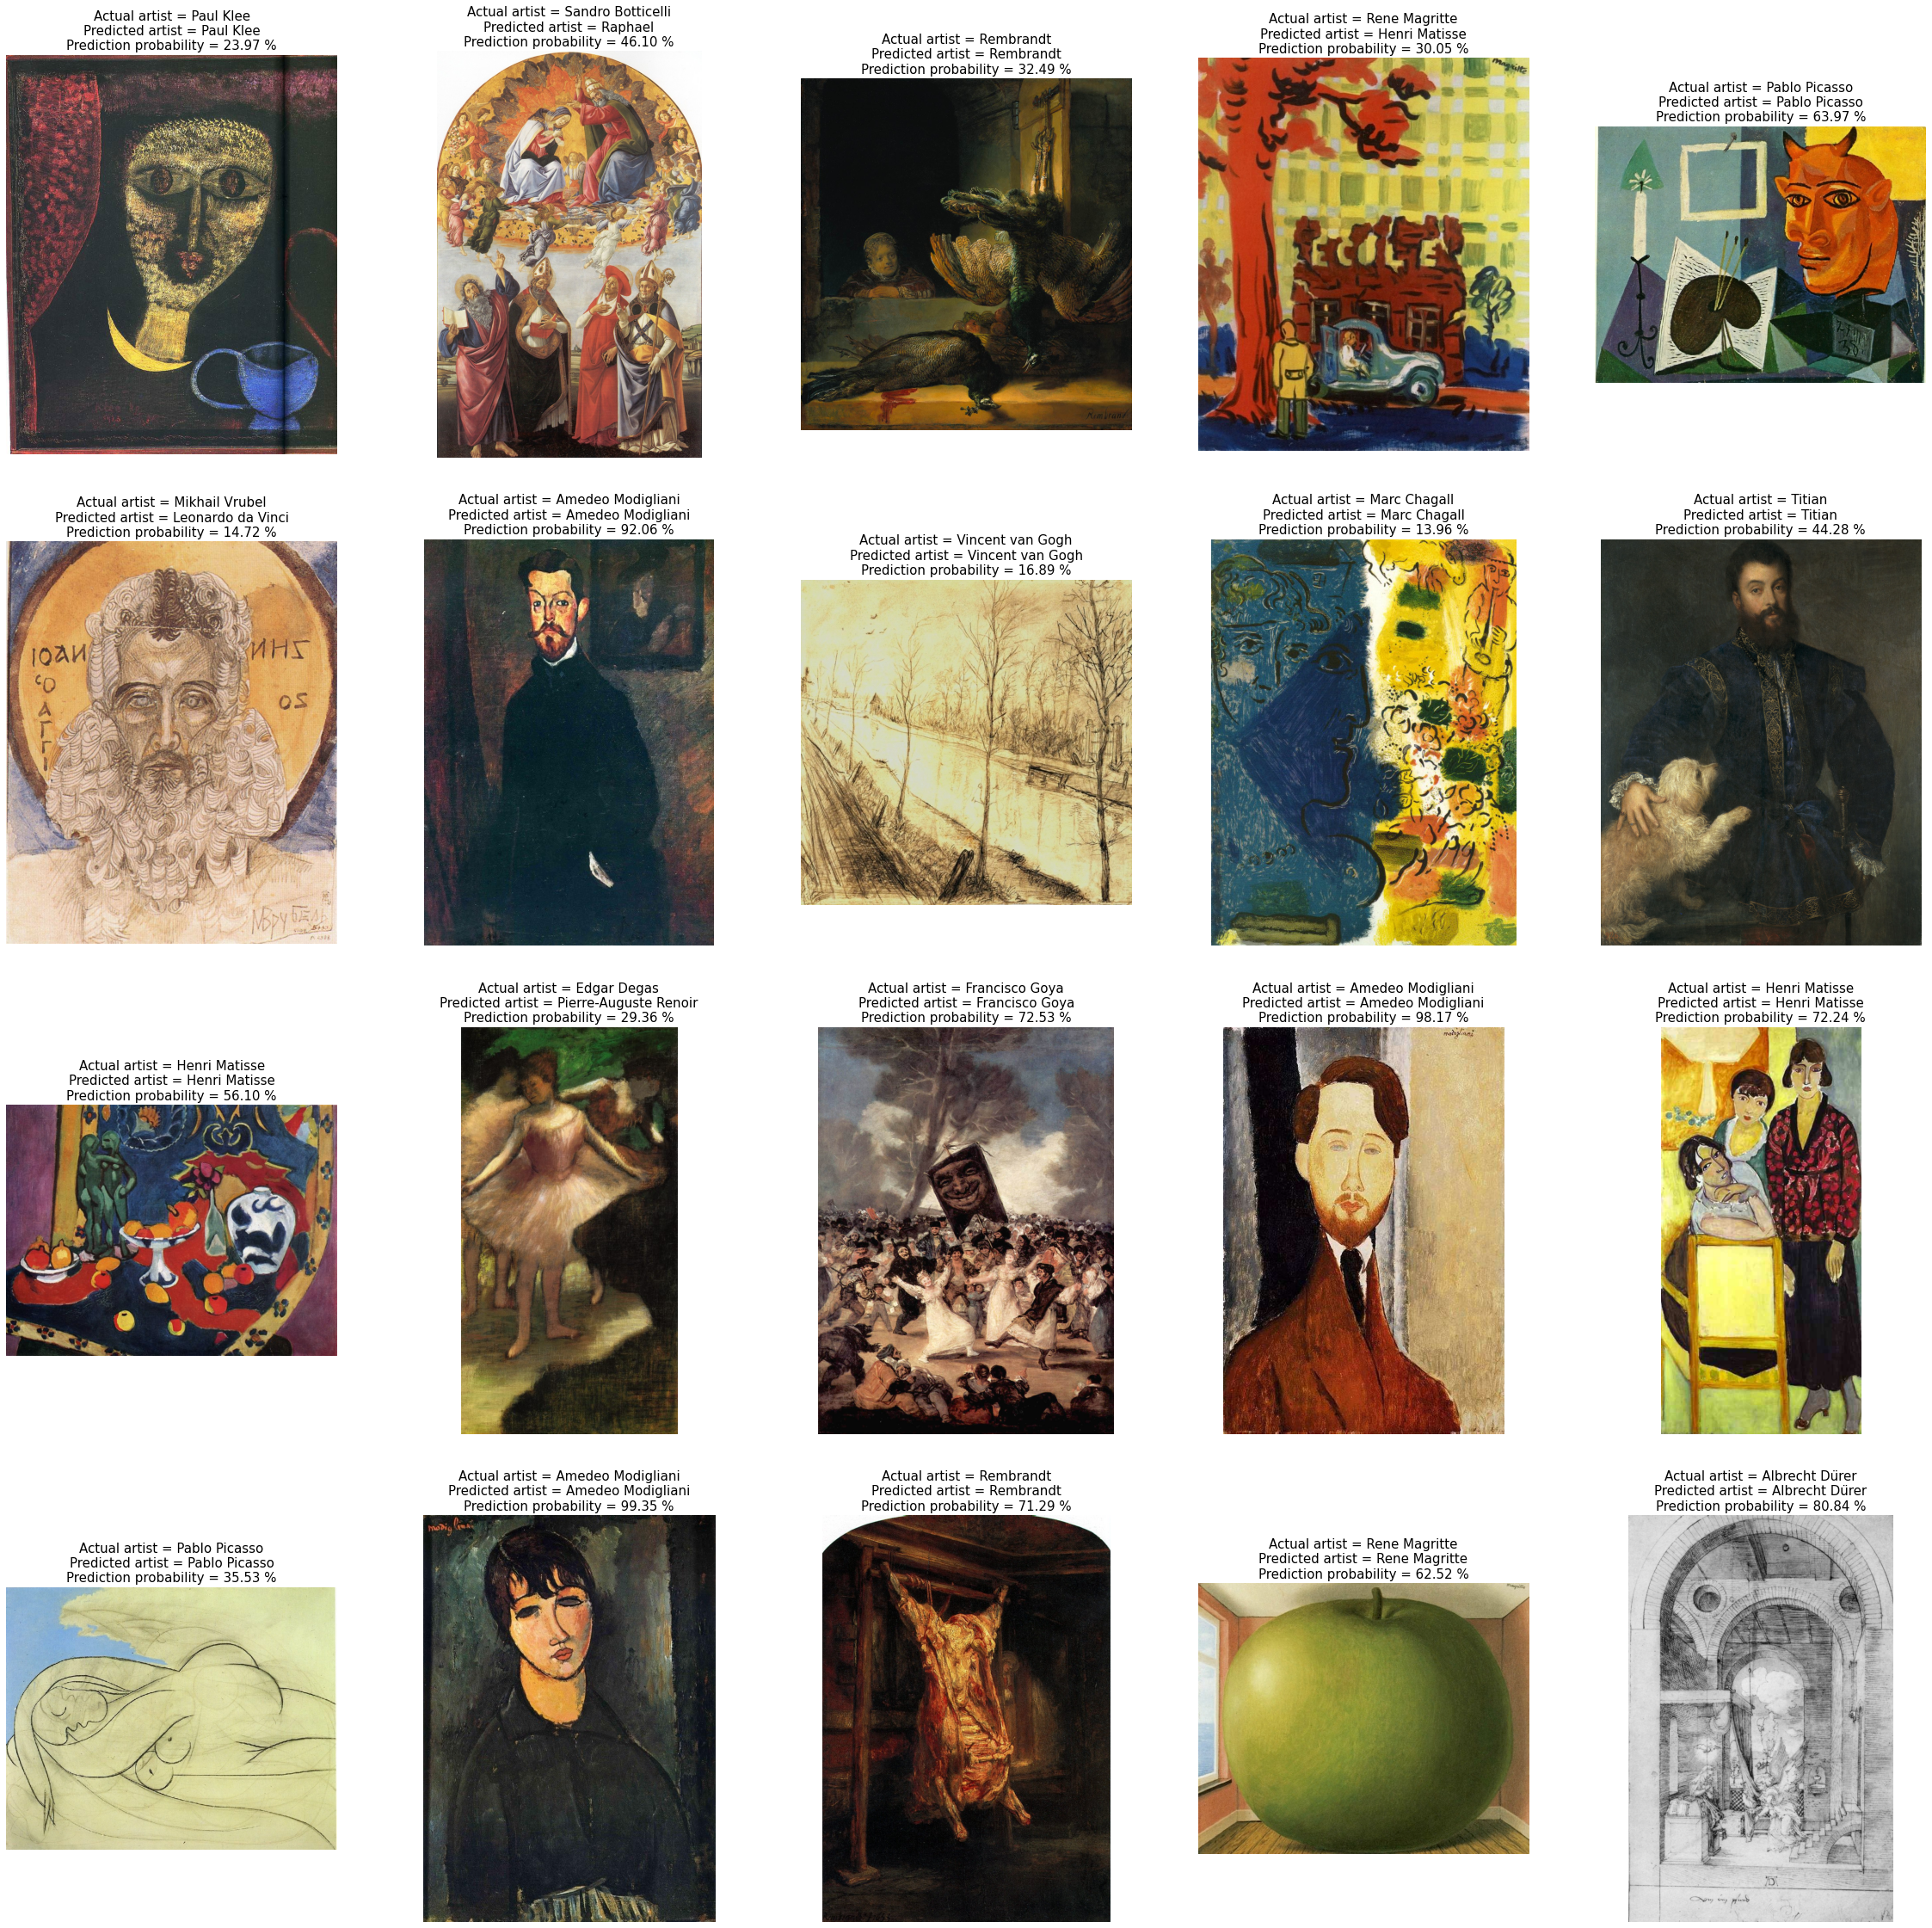

0.8


In [25]:
# Prediction
from keras.preprocessing import *

count = 0
n = 5
m = 4
fig, axes = plt.subplots(m, n, figsize=(40,40))
test_dir = './test'

f = os.listdir(test_dir)
# for i in f:
    # image = './images/test/'
    # a = os.listdir(os.path.join('./images/test/'+str(i)))

for j in range(m):
    for i in range(n):
        random_artist = random.choice(artists_sort_name)
        random_image = random.choice(os.listdir(os.path.join(test_dir, random_artist)))
        random_image_file = os.path.join(test_dir, random_artist, random_image)

            # Original image

        test_image = tf.keras.utils.load_img(random_image_file, target_size=(train_input_shape[0:2]))

            # Predict artist
        test_image = tf.keras.utils.img_to_array(test_image)
        test_image /= 255.
        test_image = np.expand_dims(test_image, axis=0)

        prediction = efficientnet100.predict(test_image)
        prediction_probability = np.amax(prediction)
        prediction_idx = np.argmax(prediction)

        labels = train_generator_100.class_indices
        labels = dict((v,k) for k,v in labels.items())

            #print("Actual artist =", random_artist.replace('_', ' '))
            #print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
            #print("Prediction probability =", prediction_probability*100, "%")

        title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                        .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                                prediction_probability*100)

            # Print image
        axes[j][i].imshow(plt.imread(random_image_file))
        axes[j][i].set_title(title, fontsize=15)
        axes[j][i].axis('off')

        if random_artist.replace('_', ' ') == labels[prediction_idx].replace('_', ' '):
            count += 1

plt.show()
print(count/(n*m))

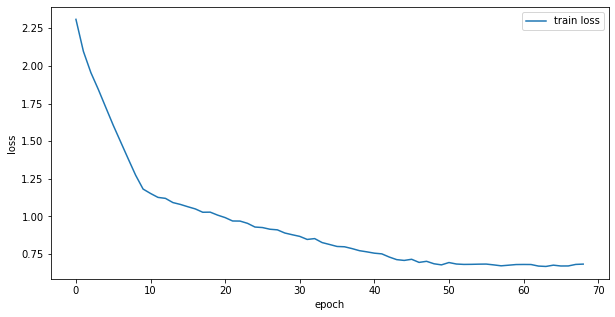

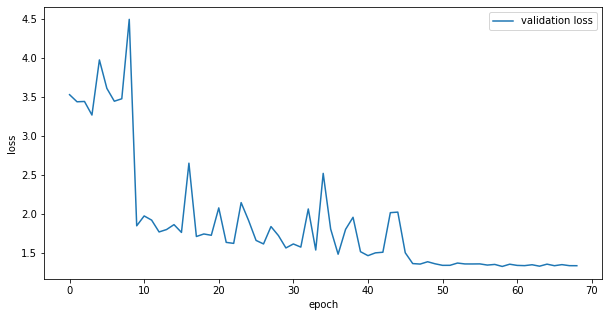

In [26]:
plt.figure(figsize=(10,5), linewidth = 2)
plt.plot(history_efficientnet100.epoch, history_efficientnet100.history['loss'], label = 'train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5), linewidth = 2)
plt.plot(history_efficientnet100.epoch, history_efficientnet100.history['val_loss'], label = 'validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# Prediction accuracy on train data
score = efficientnet100.evaluate(train_generator_100, verbose=1)
print("Prediction accuracy on train data =", score[1])

# Prediction accuracy on CV data
score = efficientnet100.evaluate(valid_generator_100, verbose=1)
print("Prediction accuracy on CV data =", score[1])

639/639 [==============================] - 84s 131ms/step - loss: 0.6243 - accuracy: 0.9296
Prediction accuracy on train data = 0.9295774698257446
158/158 [==============================] - 21s 134ms/step - loss: 1.3310 - accuracy: 0.6975
Prediction accuracy on CV data = 0.6975455284118652


In [28]:
efficientnet100.save('./efficientnet_100.h5')